# Analyzing the scraped data
When scraping data from the internet, we often need to do some "sanity checks" to make sure that the collected data is what we expect it to be, because in scraping we are exposed to connection problems, bans from the host, and errors caused by the differences between the HTML structures of different web pages.

In this notebook, you are asked to plot some graphs to explore the data that you have collected and find the problems in it, if any.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Exploring the downloaded HTML files

### Task 1.1
In this task, you have to plot the distribution of the file sizes of the HTML pages that you have downloaded. Usually, all pages will have a similar size. If you notice that you have a number of files with a significantly different size than the majority of the files, then it may be a good idea to check these files and explore the reason behind this difference. For example, in our code we are saving empty HTML files if we face an error while downloading the web pages. Therefore, seeing a number of files with size zero in the histogram indicates that we have some HTML pages that were not downloaded.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


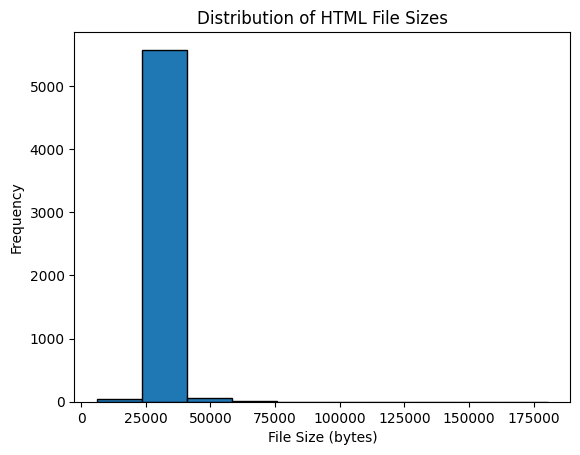

In [35]:
# Plot the distribution of the downloaded HTML file sizes
# WRITE YOUR CODE HERE

from google.colab import drive
drive.mount ('/content/drive')

data_set = "/content/drive/MyDrive/raw_html"

import os 
# Collect the file sizes of the HTML pages
file_sizes = []
for filename in os.listdir(data_set):
    filepath = os.path.join(data_set, filename)
    if os.path.isfile(filepath):
        file_sizes.append(os.path.getsize(filepath))

# Filter out empty files (size = 0)
file_sizes = [size for size in file_sizes if size > 0]

# Plot the distribution of file sizes
plt.hist(file_sizes, bins=10, edgecolor='black')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')
plt.title('Distribution of HTML File Sizes')

if not os.path.exists('figures'):
    os.makedirs('figures')
# Save the final plot in figures/file_sizes.png using the code below
plt.savefig('/content/drive/MyDrive/figures/html_file_size.png')

plt.show()


### Task 1.2
Since the HTML file size is significantly affected by the images it contains, another way to explore the downloaded HTML files is by looking at the number of lines in each file. In this task, you need to plot a distribution of the number of lines in the downloaded HTML files.

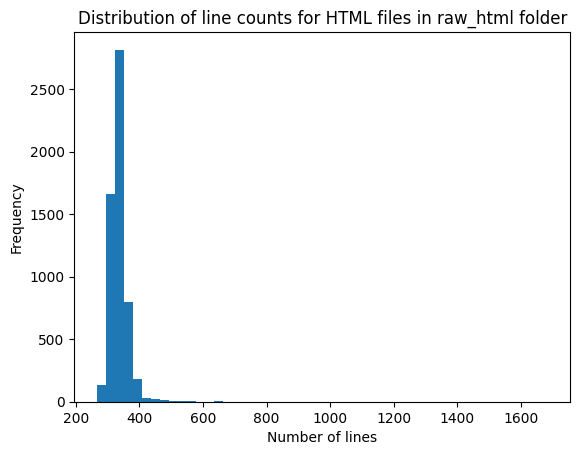

In [36]:
# Plot the distribution of line counts in the downloaded HTML files
import linecache

# path to "raw_html" folder
raw_html_path = "/content/drive/MyDrive/raw_html"

collected_files = [filename for filename in os.listdir(raw_html_path) if filename.endswith('.html')]

# list of line counts for each HTML file
count_lines = []
for filename in collected_files:
    with open(os.path.join(raw_html_path, filename), 'r') as f:
        lines = f.readlines()
        count_lines.append(len(lines))

# plot histogram of line counts
plt.hist(count_lines, bins=50)

plt.xlabel('Number of lines')
plt.ylabel('Frequency')
plt.title('Distribution of line counts for HTML files in raw_html folder')

# Save the final plot in figures/html_line_count.png using the code below
plt.savefig('/content/drive/MyDrive/figures/html_line_count.png')


## 2. Exploring the processed data

### Task 2.1
The first thing to check is if we have extracted information from all of the collected links or not. In this task, you need to compare the number of links that you have collected (in link_list.txt) to the number of parsed data dictionaries (in parsed_data.jsons) that you have created by parsing the downloaded HTML files.

In [37]:
# Compute the number of links in link_list.txt
import json
link_list = "/content/drive/MyDrive/link_list.txt"
parsed_data = "/content/drive/MyDrive/parsed_data.jsons"

n_collected_links = 0
n_parsed_links = 0
#the number of links in link_list.txt
with open(link_list) as f:
    for line in f:
        url = line.split('\t')[1]
        if 'http' in url:
            n_collected_links += 1

#the number of the parsed data
with open(parsed_data, 'r') as file:
    parsed_data = [json.loads(line) for line in file]
    n_parsed_links = len(parsed_data)

print(f"Number of collected links: {n_collected_links}")
print(f"Number of parsed links: {n_parsed_links}")

Number of collected links: 5615
Number of parsed links: 5613


### Task 2.2
In this task, you need to plot the distribution of line counts in the text content that you extracted from the HTML web pages. This will help point out some errors in content extraction, if any.

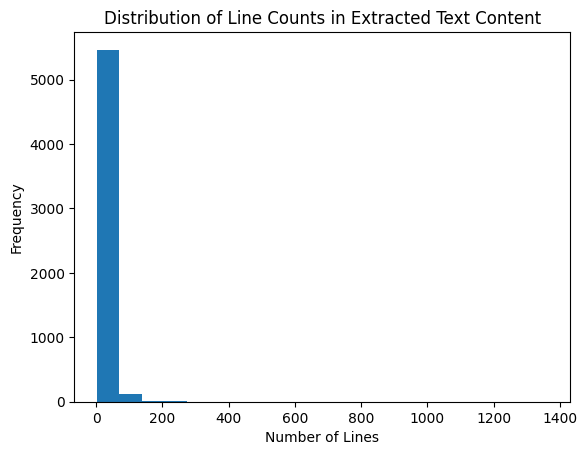

In [38]:
#Plot the distribution of line counts in the extracted text content
parsed_data_file = "/content/drive/MyDrive/parsed_data.jsons"

# Load the extracted text content from parsed_data.jsons
with open(parsed_data_file, 'r') as file:
    parsed_data = [json.loads(line) for line in file]

#the line counts for each extracted text content
line_counts = [len(data['content'].split('\n')) for data in parsed_data]

# Plot the distribution of line counts
plt.hist(line_counts, bins=20)
plt.xlabel('Number of Lines')
plt.ylabel('Frequency')
plt.title('Distribution of Line Counts in Extracted Text Content')

# Save the plot
plt.savefig('/content/drive/MyDrive/figures/content_line_count.png')
#plt.show()

### Task 2.3
In this task, you need to plot the distribution of the dates of the collected news articles.

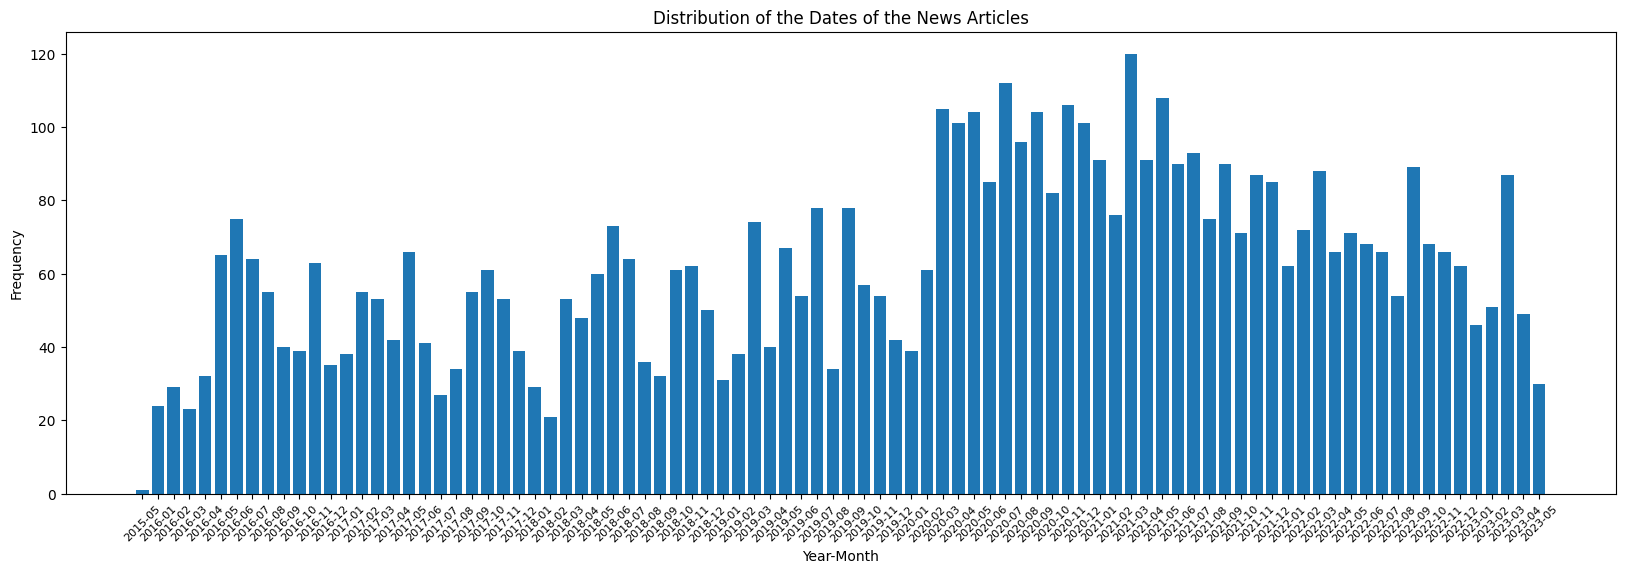

In [41]:
from datetime import datetime

parsed_data_file = "/content/drive/MyDrive/parsed_data.jsons"

# Load the extracted text content from parsed_data.jsons
with open(parsed_data_file, 'r') as file:
    parsed_data = [json.loads(line) for line in file]

# Extract the year-month information from the date
year_months = [datetime.strptime(data['date'], "%d %B, %Y").strftime("%Y-%m") for data in parsed_data]

# Count the occurrences of each year-month combination
year_month_counts = {year_month: year_months.count(year_month) for year_month in set(year_months)}

# Sort the year-month combinations by date
sorted_year_months = sorted(year_month_counts.keys())

# Extract the counts for each year-month combination
counts = [year_month_counts[year_month] for year_month in sorted_year_months]

plt.figure(figsize=(20, 6))
plt.bar(sorted_year_months, counts)
plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Frequency')
plt.title('Distribution of the Dates of the News Articles')
plt.xticks(rotation=45, fontsize=8)

plt.savefig('/content/drive/MyDrive/figures/date_dist.png')